In [30]:
# import qiskit
import qiskit.visualization
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from qiskit.quantum_info import Statevector


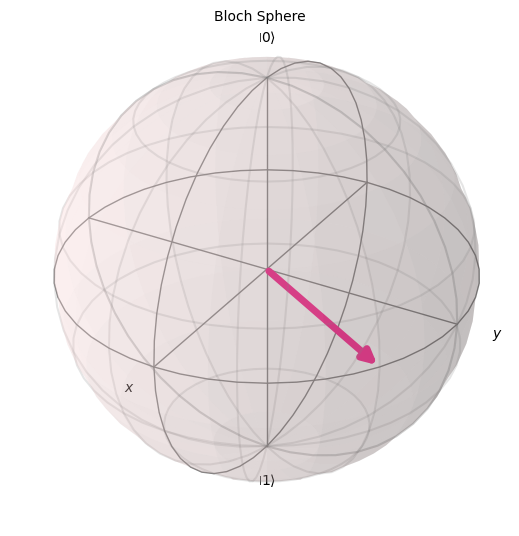

In [31]:
plot_bloch_vector(bloch=[1,np.pi/2, np.pi/3] ,title='Bloch Sphere', ax=None,figsize=None, coord_type='spherical', font_size=None)

Draw the states |0>, |1>, |+->, |+-i> using qiskit

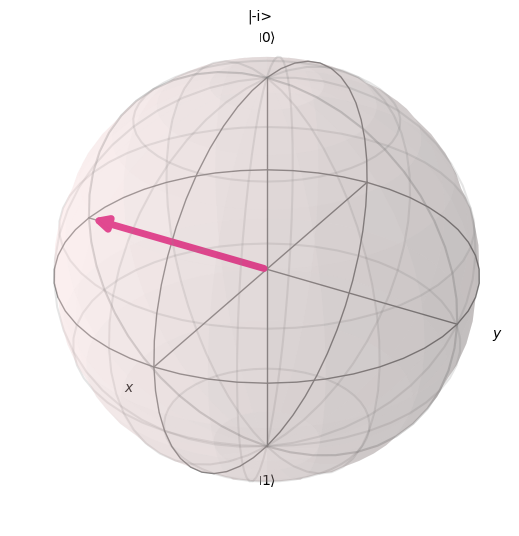

In [32]:
#|0>
plot_bloch_vector([1,0, 0], coord_type='spherical', title='|0>')
#|1>
plot_bloch_vector([1,np.pi, 0], coord_type='spherical', title='|1>')
#|+>
plot_bloch_vector([1, np.pi/2, 0], coord_type='spherical', title='|+>')
#|->
plot_bloch_vector([1, np.pi/2, np.pi], coord_type='spherical', title='|->')
#|+i>
plot_bloch_vector([1, np.pi/2, np.pi/2], coord_type='spherical', title='|+i>')
#|-i>
plot_bloch_vector([1, np.pi/2, -np.pi/2], coord_type='spherical', title='|-i>')

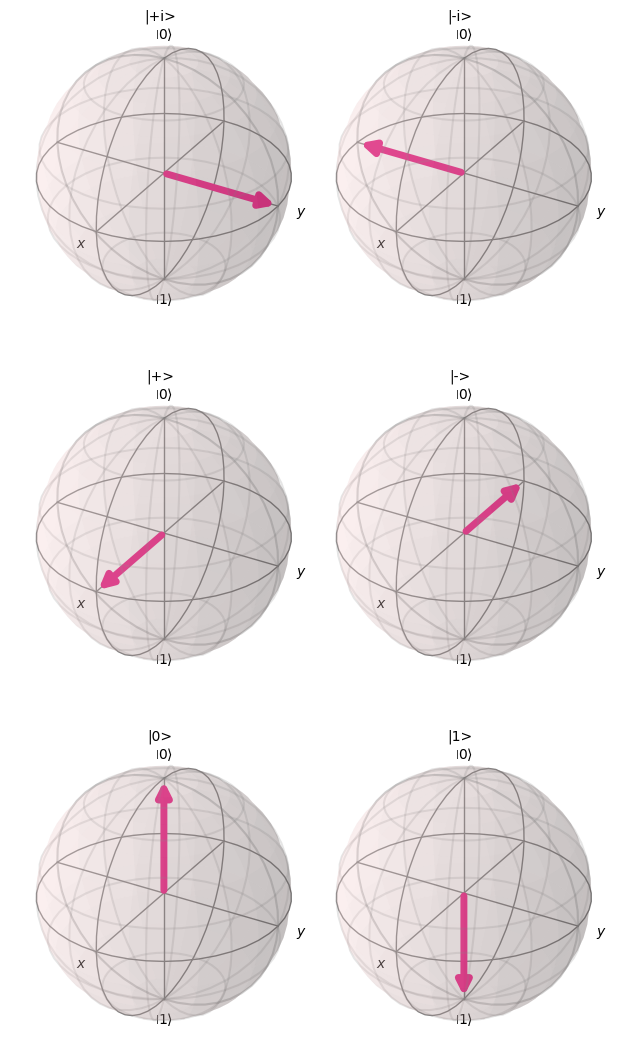

In [33]:
fig = plt.figure(figsize = [6, 9])

states = [
    [1, 0, 0],
    [1,np.pi, 0],
    [1, np.pi/2, 0],
    [1, np.pi/2, np.pi],
    [1, np.pi/2, np.pi/2],
    [1, np.pi/2, -np.pi/2],
]

#Titles
titles = ['|0>', '|1>', '|+>', '|->', '|+i>', '|-i>']

# Add a subplot for each state:

# Values are in fractions of figure width and height:
positions = [
    [0, 0],
    [0.5, 0],
    [0, 0.4],
    [0.5, 0.4],
    [0, 0.8],
    [0.5, 0.8],
]

for m in range(len(states)):
    ax = fig.add_axes([positions[m][0], positions[m][1], 0.5, 0.333], axes_class = Axes3D)
    plot_bloch_vector(states[m], coord_type='spherical', ax = ax, title=titles[m])

Using the Statevector class, create the table  
|psi> = (1/3 + 2i/3)|0> - 2/3|1>  
Applying the measure method one time, what is the result ? What is the post-measurement state ?  
Simulate 1000 measurements and plot the histogram of the results. What is your conclusion ?  

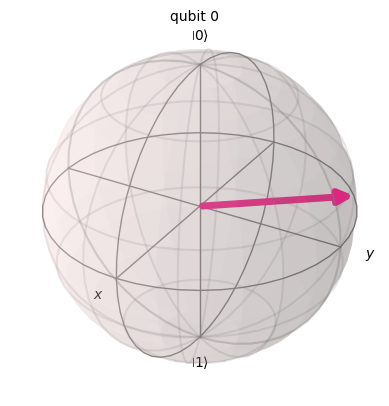

In [34]:
psi = Statevector([1/3 + 2j/3, -2/3])

psi.draw('bloch')


In [35]:
psi.draw('latex')

<IPython.core.display.Latex object>

In [36]:
# Apply Measurement Method

# Apply the measure method one time and record the result
result = psi.measure()

# Print the measurement result
print("Measurement result:", result)

# Get the post-measurement state
post_measurement_state = psi

# Print the post-measurement state
print("Post-measurement state:", post_measurement_state)
psi.draw('latex')

Measurement result: (np.str_('0'), Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
            dims=(2,)))
Post-measurement state: Statevector([ 0.33333333+0.66666667j, -0.66666667+0.j        ],
            dims=(2,))


<IPython.core.display.Latex object>

In [37]:
measurements = []
for i in range(1000):
    measurements.append(psi.measure())
print(measurements)

[(np.str_('1'), Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))), (np.str_('1'), Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))), (np.str_('0'), Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
            dims=(2,))), (np.str_('1'), Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))), (np.str_('0'), Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
            dims=(2,))), (np.str_('1'), Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))), (np.str_('1'), Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))), (np.str_('1'), Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))), (np.str_('0'), Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
            dims=(2,))), (np.str_('0'), Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
            dims=(2,))), (np.str_('0'), Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
            dims=(2,))), (np.str_('0'), Statevector([0.4472136+0.89442719j, 0.       +0.j   

Premier element :  1
Deuxième element :  Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))


(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array([-1.        , -0.85527864, -0.71055728, -0.56583592, -0.42111456,
        -0.2763932 , -0.13167184,  0.01304952,  0.15777088,  0.30249224,
         0.4472136 ]),
 <a list of 1000 BarContainer objects>)

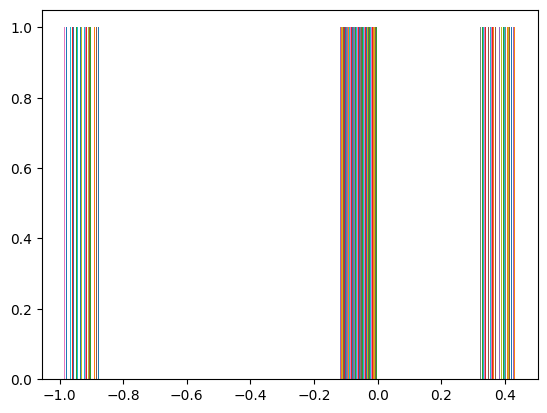

In [38]:
print("Premier element : ",measurements[0][0])
print("Deuxième element : ",measurements[0][1])

# Hisotgram of the measurements seconde elemetns
plt.hist([m[1] for m in measurements])


On observe trois intervalles de valeurs probables que peut prendre la mesure.  
Un intervalle autour de -0.9, un entre -0.1 et 0, et un dernier entre 0.3 et 0.4.  